In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [178]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/coaster_db.csv')
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2

\

# \#1 Explore and Understand the data

\

In [179]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [180]:
df.shape

(1087, 56)

In [181]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [182]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [183]:
df.isna().sum()

,0
coaster_name,0
Length,134
Speed,150
Location,0
Status,213
Opening date,250
Type,0
Manufacturer,59
Height restriction,256
Model,343


In [184]:
df.duplicated().sum()

0

\

#\#2 Clean and Prepare the Data

### 1.   Drop unwanted columns and rows
### 2.   Remove Duplicates
### 3.   Remove NAN columns if have more than 75% NAN

In [185]:
df = df[['coaster_name', 'Location',
       'Type', 'Manufacturer', 'Model', 'Cost',
        'Capacity', 'G-force', 'Designer',
       'year_introduced', 'Type_Main',
       'speed_mph', 'height_value', 'height_ft']]

df

,coaster_name,Location,Type,Manufacturer,Model,Cost,Capacity,G-force,Designer,year_introduced,Type_Main,speed_mph,height_value,height_ft
0,Switchback Railway,Coney Island,Wood,LaMarcus Adna Thompson,Lift Packed,NaN,1600 riders per hour,2.9,LaMarcus Adna Thompson,1884,Wood,6.0,50.0,NaN
1,Flip Flap Railway,Sea Lion Park,Wood,Lina Beecher,NaN,NaN,NaN,12,Lina Beecher,1895,Wood,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Other,NaN,NaN,NaN,NaN,NaN,NaN,1896,Other,NaN,NaN,NaN
3,Loop the Loop (Coney Island),Other,Steel,Edwin Prescott,NaN,NaN,NaN,NaN,Edward A. Green,1901,Steel,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),Other,Steel,Edwin Prescott,NaN,NaN,NaN,NaN,Edward A. Green,1901,Steel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,Steel,Anton Schwarzkopf,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,2022,Steel,53.0,111.0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Steel – Launched,Intamin,Blitz Coaster,NaN,NaN,NaN,NaN,2022,Steel,73.0,178.0,NaN
1084,Tron Lightcycle Power Run,Other,Steel – Launched,Vekoma,Motorbike roller coaster,NaN,"1,680 riders per hour",4,Walt Disney Imagineering,2022,Steel,59.3,78.1,NaN
1085,Tumbili,Kings Dominion,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,4D Free Spin,NaN,NaN,NaN,NaN,2022,Steel,34.0,112.0,NaN


In [186]:
# let's eliminate rows that have other value in the location column

df = df[df['Location'] != 'Other']
df

,coaster_name,Location,Type,Manufacturer,Model,Cost,Capacity,G-force,Designer,year_introduced,Type_Main,speed_mph,height_value,height_ft
0,Switchback Railway,Coney Island,Wood,LaMarcus Adna Thompson,Lift Packed,NaN,1600 riders per hour,2.9,LaMarcus Adna Thompson,1884,Wood,6.0,50.0,NaN
1,Flip Flap Railway,Sea Lion Park,Wood,Lina Beecher,NaN,NaN,NaN,12,Lina Beecher,1895,Wood,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Other,NaN,NaN,NaN,NaN,NaN,NaN,1896,Other,NaN,NaN,NaN
5,Cannon Coaster,Coney Island,Wood,George Francis Meyer,NaN,NaN,NaN,NaN,NaN,1902,Wood,NaN,40.0,NaN
6,Leap-The-Dips,Lakemont Park,Wood – Side friction,Federal Construction Company,NaN,NaN,NaN,NaN,Edward Joy Morris,1902,Wood,10.0,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Iron Gwazi,Busch Gardens Tampa Bay,Steel – Wooden,Rocky Mountain Construction,I-Box Track,NaN,NaN,NaN,Alan Schilke,2022,Steel,76.0,206.0,NaN
1081,Leviathan (Sea World),Sea World,Wood,Martin & Vleminckx,NaN,"$20,000,000[1]",720 riders per hour,NaN,The Gravity Group,2022,Wood,49.7,32.0,105.0
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Steel – Launched,Intamin,Blitz Coaster,NaN,NaN,NaN,NaN,2022,Steel,73.0,178.0,NaN
1085,Tumbili,Kings Dominion,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,4D Free Spin,NaN,NaN,NaN,NaN,2022,Steel,34.0,112.0,NaN


In [187]:
df.dropna()

,coaster_name,Location,Type,Manufacturer,Model,Cost,Capacity,G-force,Designer,year_introduced,Type_Main,speed_mph,height_value,height_ft
183,Python (Efteling),Efteling,Steel,Vekoma,Double Loop Corkscrew,"€ 9,4 million",1400 riders per hour,3.5,Vekoma,1981,Steel,46.6,29.0,95.1
225,Mindbender (Galaxyland),Galaxyland,Steel – Twister,Anton Schwarzkopf,Sitting Coaster,"$6,000,000",430 riders per hour,5.2,Werner Stengel,1985,Steel,60.0,44.2,145.0
357,Nemesis (roller coaster),Alton Towers,Steel – Inverted,Bolliger & Mabillard,Inverted Coaster – Custom,£10 million,1200 riders per hour,3.5[2],Werner Stengel,1994,Steel,50.3,13.0,42.7
365,Arkham Asylum – Shock Therapy,Warner Bros. Movie World,Steel – Inverted,Vekoma,Suspended Looping Coaster (765m Extended w/ He...,"A$16,000,000",1010 riders per hour,4,Vekoma,1995,Steel,54.7,33.3,109.3
451,Oblivion (roller coaster),Alton Towers,Steel – Dive Coaster,Bolliger & Mabillard,Dive Coaster,£12 million,"1,900 riders per hour",4.5,Werner Stengel,1998,Steel,68.4,19.8,65.0
600,Galactica (roller coaster),Alton Towers,Steel – Flying,Bolliger & Mabillard,Flying Coaster,£12 million,"1,500 riders per hour",3.5,John Wardley,2002,Steel,46.6,20.0,65.6
611,Scooby-Doo Spooky Coaster,Warner Bros. Movie World,Steel – Wild Mouse – Enclosed,Mack Rides,Custom,"A$13,000,000[1]",1000 riders per hour,2.4,Warner Bros. Movie World,2002,Steel,27.7,17.0,55.8
634,Nemesis Inferno,Thorpe Park,Steel – Inverted,Bolliger & Mabillard,Inverted Coaster – Custom,£8 million,"1,150 riders per hour",5,John Wardley & Werner Stengel & Jordan Forster,2003,Steel,49.7,29.0,95.1
641,Thunder Dolphin,Tokyo Dome City Attractions,Steel,Intamin,Mega Coaster,"$37,000,000","1,660 riders per hour",4.4,Werner Stengel,2003,Steel,80.8,80.0,262.5
690,Rita (roller coaster),Alton Towers,Steel – Launched,Intamin,Accelerator Coaster,"£8,000,000",1150[1] riders per hour,4.7,Werner Stengel,2005,Steel,61.1,18.4,60.4


In [188]:
df.shape

(837, 14)

In [189]:
# remove columns that have null values more than threshold percentage ex:75%

def eliminate_nulls(df, threshold=75):
    threshold = threshold/100
    df = df.dropna(axis=1, thresh=df.shape[0]*threshold, inplace=True)
    return df

eliminate_nulls(df)

<ipython-input-189-84bb8e2c4d13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.dropna(axis=1, thresh=df.shape[0]*threshold, inplace=True)


In [190]:
df.reset_index(drop=True, inplace=True)
df

,coaster_name,Location,Type,Manufacturer,year_introduced,Type_Main,speed_mph,height_value
0,Switchback Railway,Coney Island,Wood,LaMarcus Adna Thompson,1884,Wood,6.0,50.0
1,Flip Flap Railway,Sea Lion Park,Wood,Lina Beecher,1895,Wood,NaN,NaN
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Other,NaN,1896,Other,NaN,NaN
3,Cannon Coaster,Coney Island,Wood,George Francis Meyer,1902,Wood,NaN,40.0
4,Leap-The-Dips,Lakemont Park,Wood – Side friction,Federal Construction Company,1902,Wood,10.0,41.0
...,...,...,...,...,...,...,...,...
832,Iron Gwazi,Busch Gardens Tampa Bay,Steel – Wooden,Rocky Mountain Construction,2022,Steel,76.0,206.0
833,Leviathan (Sea World),Sea World,Wood,Martin & Vleminckx,2022,Wood,49.7,32.0
834,Pantheon (roller coaster),Busch Gardens Williamsburg,Steel – Launched,Intamin,2022,Steel,73.0,178.0
835,Tumbili,Kings Dominion,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,2022,Steel,34.0,112.0


In [191]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['coaster_name'])].head(5)

,coaster_name,Location,Type,Manufacturer,year_introduced,Type_Main,speed_mph,height_value
39,Crystal Beach Cyclone,Crystal Beach Park,Wood,Traver Engineering,1927,Wood,60.0,96.0
55,Derby Racer,Revere Beach,Wood – Racing,Fred W. Pearce,1937,Wood,NaN,NaN
56,Blue Streak (Conneaut Lake),Conneaut Lake Park,Wood,NaN,1938,Wood,50.0,77.0
193,Thunder Run (Canada's Wonderland),Canada's Wonderland,Steel – Powered – Mine Train,Mack Rides,1986,Steel,39.8,10.0
222,Ultra Twister (Nagashima Spa Land),Nagashima Spa Land,Steel – Pipeline,TOGO,1989,Steel,NaN,NaN


In [192]:
df.query("coaster_name == 'Derby Racer'")

,coaster_name,Location,Type,Manufacturer,year_introduced,Type_Main,speed_mph,height_value
12,Derby Racer,Revere Beach,Wood – Racing,Fred W. Pearce,1911,Wood,NaN,NaN
55,Derby Racer,Revere Beach,Wood – Racing,Fred W. Pearce,1937,Wood,NaN,NaN


In [193]:
df.drop_duplicates(subset=['coaster_name', 'Location', 'Type', 'Manufacturer'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

<ipython-input-193-5d000b06f920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['coaster_name', 'Location', 'Type', 'Manufacturer'], inplace=True)


,coaster_name,Location,Type,Manufacturer,year_introduced,Type_Main,speed_mph,height_value
0,Switchback Railway,Coney Island,Wood,LaMarcus Adna Thompson,1884,Wood,6.0,50.0
1,Flip Flap Railway,Sea Lion Park,Wood,Lina Beecher,1895,Wood,NaN,NaN
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Other,NaN,1896,Other,NaN,NaN
3,Cannon Coaster,Coney Island,Wood,George Francis Meyer,1902,Wood,NaN,40.0
4,Leap-The-Dips,Lakemont Park,Wood – Side friction,Federal Construction Company,1902,Wood,10.0,41.0
...,...,...,...,...,...,...,...,...
804,Ice Breaker (roller coaster),SeaWorld Orlando,Steel – Launched,Premier Rides,2022,Steel,52.0,93.0
805,Leviathan (Sea World),Sea World,Wood,Martin & Vleminckx,2022,Wood,49.7,32.0
806,Pantheon (roller coaster),Busch Gardens Williamsburg,Steel – Launched,Intamin,2022,Steel,73.0,178.0
807,Tumbili,Kings Dominion,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,2022,Steel,34.0,112.0


In [194]:
grpBy_location = df.groupby('Location')
grpBy_location.get_group('Coney Island')

,coaster_name,Location,Type,Manufacturer,year_introduced,Type_Main,speed_mph,height_value
0,Switchback Railway,Coney Island,Wood,LaMarcus Adna Thompson,1884,Wood,6.0,50.0
3,Cannon Coaster,Coney Island,Wood,George Francis Meyer,1902,Wood,NaN,40.0
6,Drop the Dip,Coney Island,Other,Arthur Jarvis,1907,Other,NaN,60.0
33,Thunderbolt (1925 roller coaster),Coney Island,Wood,NaN,1925,Wood,NaN,86.0
37,Tornado (Coney Island),Coney Island,Wood,NaN,1926,Wood,NaN,71.0
371,"Python (Coney Island, Cincinnati, Ohio)",Coney Island,Steel,Pinfari,1999,Steel,NaN,40.0


In [195]:
grpBy_location.value_counts(['coaster_name']).sort_values(ascending=True).head(10)

Location                                                              coaster_name                      
2904 Fantasy Way Myrtle Beach, South Carolina, U.S.                   Round About (roller coaster)          1
Olentangy Park                                                        Loop the Loop (Olentangy Park)        1
Opryland USA                                                          Wabash Cannonball (roller coaster)    1
Orlando, FloridaKissimmee, FloridaFayetteville, GeorgiaUnited States  Hurricane (Fun Spot America)          1
                                                                      Jack Rabbit (Celebration City)        1
                                                                      Viking Voyage                         1
Pacific Park                                                          Santa Monica West Coaster             1
Palisades Amusement Park                                              Cyclone (Palisades Amusement Park)    1
Parc Astérix                                                          Goudurix                              1
                                                                      OzIris                                1
Name: count, dtype: int64

In [196]:
#getting number of coasters for each location using the grpBy_location

grpBy_location.size().sort_values(ascending=False)

#or

# df['Location'].value_counts()

,0
Location,
Kings Island,19
Cedar Point,18
Six Flags Magic Mountain,17
Hersheypark,16
Carowinds,14
...,...
Family Kingdom Amusement Park,1
Nürburgring,1
OCT East,1


\
# \#3 Feature Understanding
\

In [197]:
top_10_locs = df['Location'].value_counts().head(10)
top_10_locs

,count
Location,
Kings Island,19
Cedar Point,18
Six Flags Magic Mountain,17
Hersheypark,16
Six Flags Great Adventure,14
Carowinds,14
Canada's Wonderland,13
Alton Towers,13
Busch Gardens Williamsburg,12


<Axes: title={'center': 'Top 10 Locations Have for Coasters'}, xlabel='Location', ylabel='Number of Coasters'>

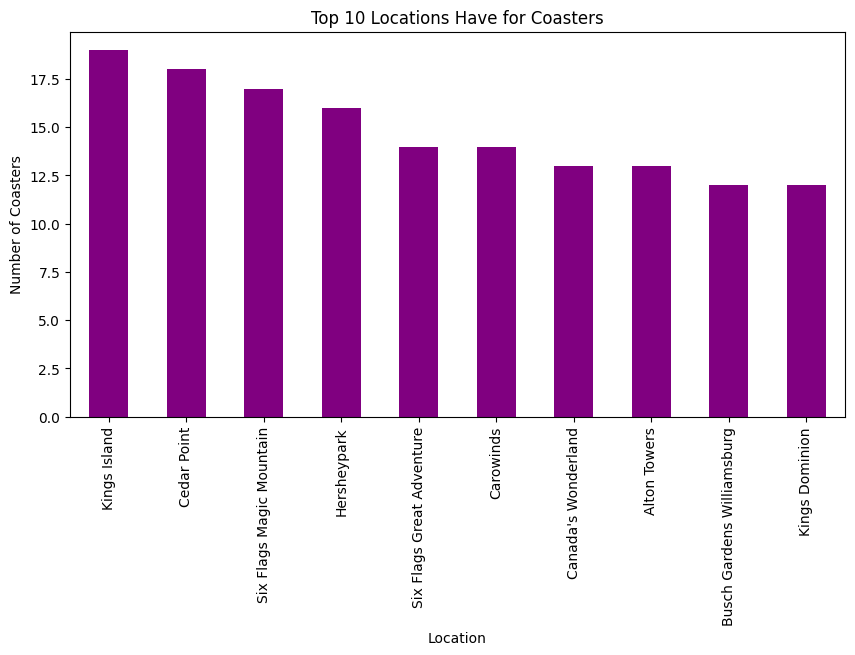

In [198]:
top_10_locs.plot(kind='bar', figsize=(10,5), title='Top 10 Locations Have for Coasters', xlabel='Location', ylabel='Number of Coasters', color='purple')

In [199]:
top5_manf = df['Manufacturer'].value_counts().head(5)
top5_manf

,count
Manufacturer,
Bolliger & Mabillard,93
Vekoma,82
Intamin,70
Mack Rides,47
Arrow Dynamics,46


<Axes: title={'center': 'Top 5 Manufacturers of Coasters'}, xlabel='Number of Coasters', ylabel='Manufacturer'>

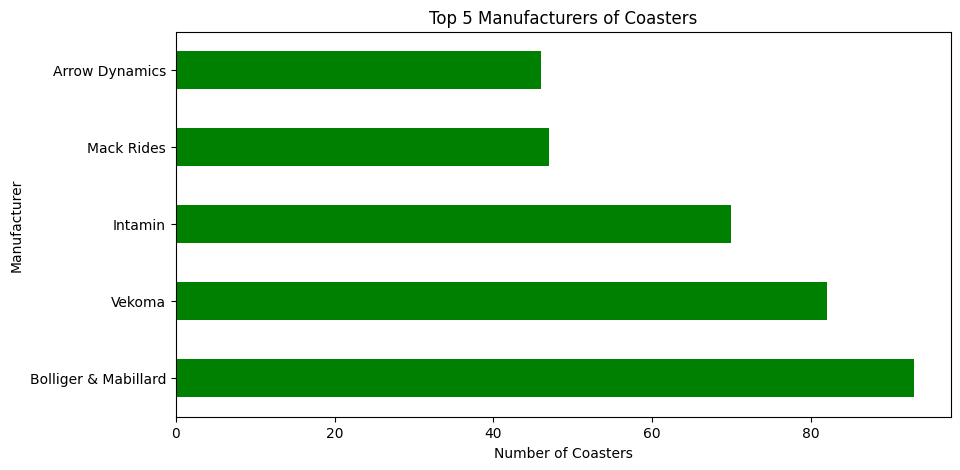

In [200]:
top5_manf.plot(kind='barh', figsize=(10,5), title='Top 5 Manufacturers of Coasters', ylabel='Manufacturer', xlabel='Number of Coasters', color='green')

<Axes: >

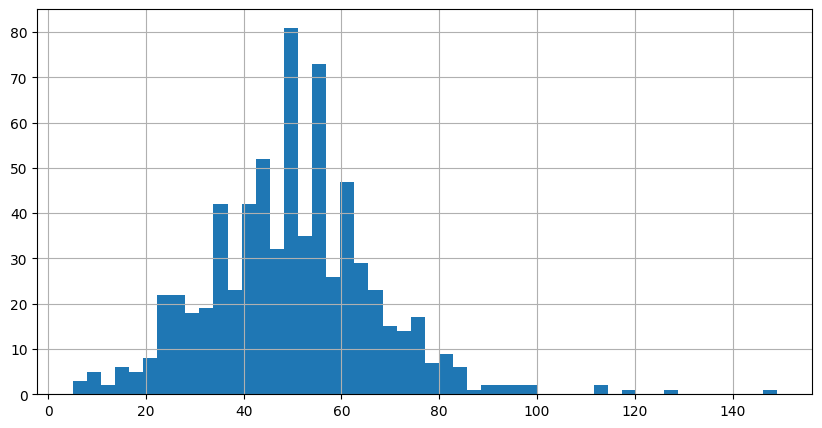

In [201]:
# distribution of speeds of coasters
df['speed_mph'].hist(bins=50, figsize=(10,5))

<Axes: title={'center': 'Distribution of Speed of Coasters'}, ylabel='Density'>

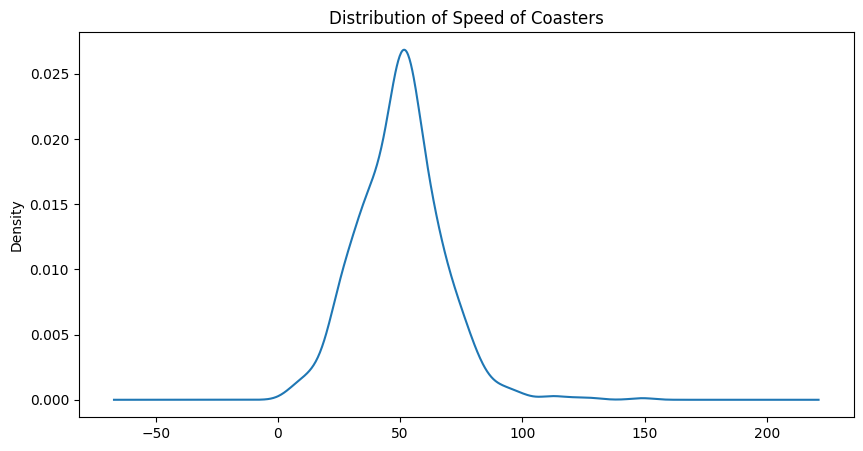

In [202]:
df['speed_mph'].plot(kind='kde', figsize=(10,5), title='Distribution of Speed of Coasters', xlabel='Speed (mph)', ylabel='Density')

\
#\#4 Feature Relationships
\

<Axes: title={'center': 'Speed vs Height'}, xlabel='speed_mph', ylabel='height_value'>

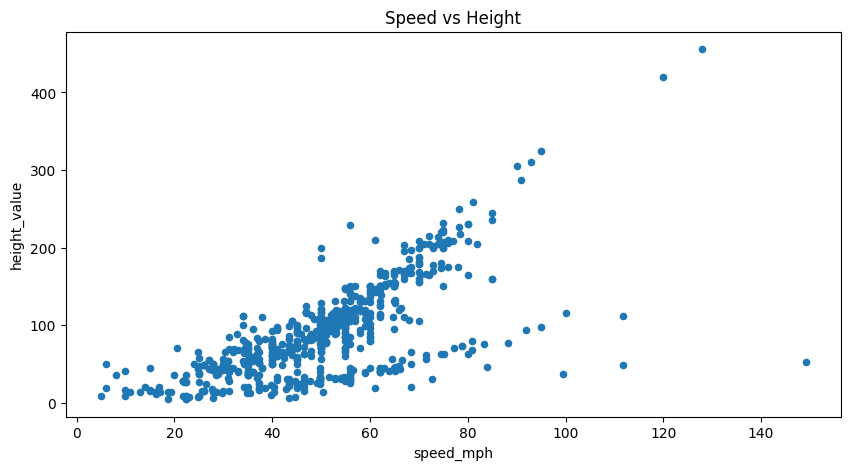

In [203]:
df.plot(kind='scatter', x='speed_mph', y='height_value', figsize=(10,5), title='Speed vs Height')

In [204]:
df[['speed_mph', 'height_value', 'year_introduced']].corr()

,speed_mph,height_value,year_introduced
speed_mph,1.000000,0.687985,0.255886
height_value,0.687985,1.000000,0.181970
year_introduced,0.255886,0.181970,1.000000


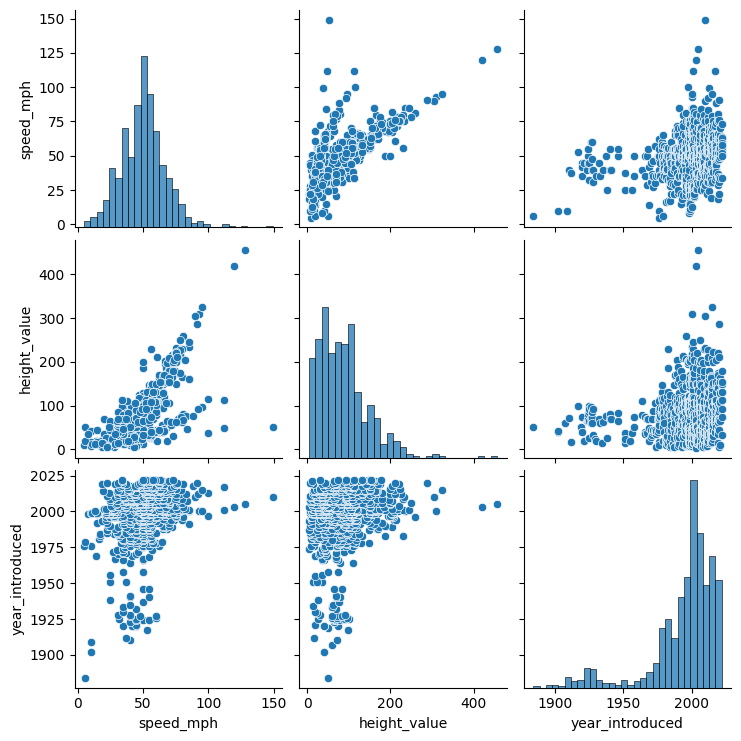

In [205]:
# pairplots
sns.pairplot(df[['speed_mph', 'height_value', 'year_introduced']])
plt.show()

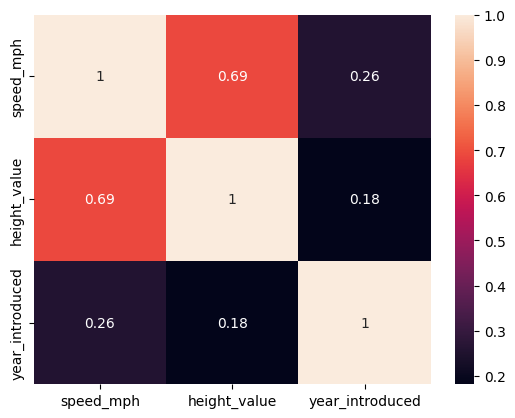

In [206]:
sns.heatmap(df[['speed_mph', 'height_value', 'year_introduced']].corr(), annot=True)
plt.show()

In [207]:
top_locs_for_speed = grpBy_location['speed_mph'].agg(['mean', 'count']).query('count >= 10').sort_values(by='mean', ascending=False).head(10)

<Axes: title={'center': 'Average Coast Speed by Location'}, xlabel='Speed (mph)', ylabel='Location'>

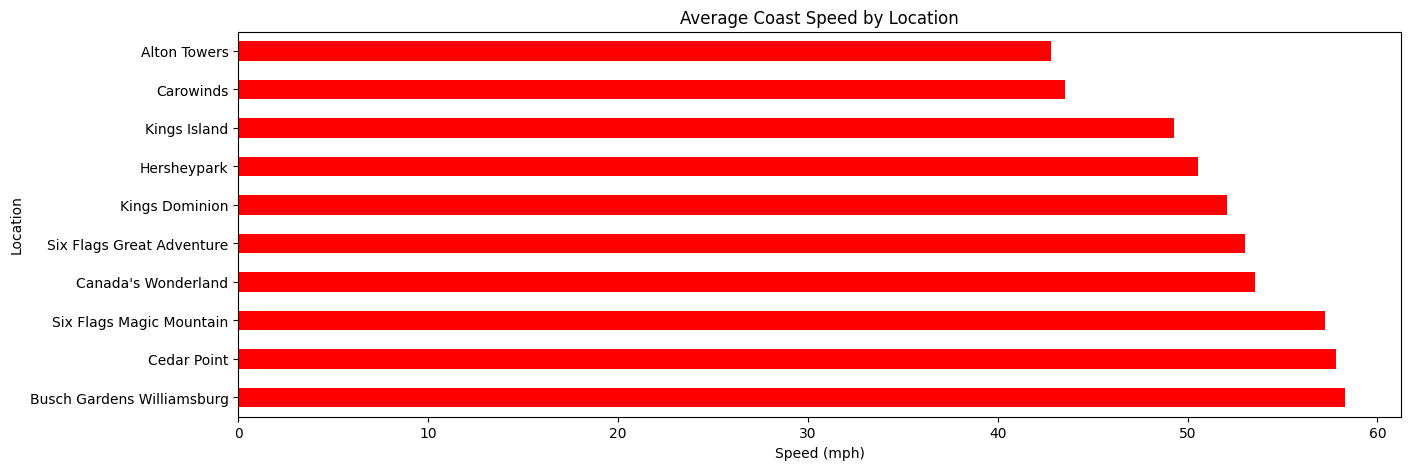

In [208]:
top_locs_for_speed['mean'].plot(kind='barh', figsize=(15,5), title='Average Coast Speed by Location', ylabel='Location', xlabel='Speed (mph)', color='red')